In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow.keras import layers

In [2]:
#loading the dataset
data = pd.read_csv('./high_diamond_ranked_10min.csv')
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
data.shape

(9879, 40)

In [4]:
data.drop('gameId',axis=1, inplace=True)

In [5]:
data.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [6]:
#shuffling the data to remove any bias from the way it was entered
#frac -> fraction of the axis items to return, frac = 1 returning all of them
data = data.sample(frac=1).reset_index(drop=True)

In [7]:
y = data['blueWins']
y

0       0
1       1
2       0
3       1
4       0
       ..
9874    0
9875    1
9876    0
9877    0
9878    1
Name: blueWins, Length: 9879, dtype: int64

In [8]:
X = data.drop('blueWins', axis=1, inplace=False)
X

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,16,2,0,5,7,6,1,1,0,0,...,0,17129,7.0,17049,215,56,916,-483,21.5,1712.9
1,13,5,1,9,2,13,1,1,0,0,...,0,14708,6.8,17315,237,39,-4371,-2705,23.7,1470.8
2,49,4,0,10,13,9,2,1,1,0,...,0,18966,7.2,18969,198,61,1223,1046,19.8,1896.6
3,15,2,0,4,5,4,0,0,0,0,...,0,16563,7.4,19026,247,54,802,1243,24.7,1656.3
4,14,3,0,4,9,3,1,1,0,0,...,0,19261,7.4,20510,259,65,3728,2079,25.9,1926.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,14,3,0,9,7,10,2,1,1,1,...,0,17431,6.8,17998,209,42,-1618,74,20.9,1743.1
9875,16,0,1,12,6,12,2,1,1,0,...,0,16182,6.6,16802,203,44,-2479,-1210,20.3,1618.2
9876,48,3,0,3,6,6,0,0,0,0,...,0,16487,7.2,18700,220,49,1501,1478,22.0,1648.7
9877,17,4,0,4,6,1,0,0,0,0,...,0,16668,7.2,18744,238,64,1149,217,23.8,1666.8


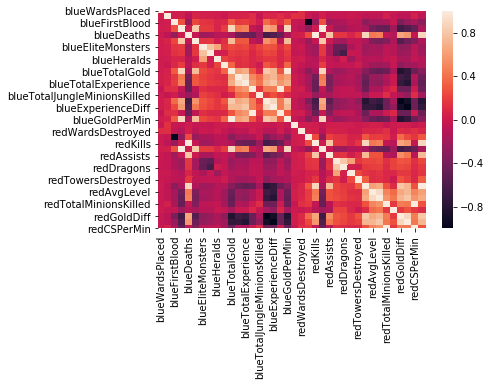

In [9]:
sns.heatmap(X.corr())

In [10]:
#tensorflow has a built in validation split
train_test_split = 0.7

num_examples = X.shape[0]
num_train_examples = int(np.floor(num_examples * train_test_split))
num_test_examples = int(np.floor(num_examples - num_train_examples))

print(num_examples)
print(num_train_examples)
print(num_test_examples)

9879
6915
2964


In [11]:
#pick a loss and optimization function
#They tie together the loss function and model parameters by updating the model in response to the output of the loss function. In simpler terms, optimizers shape and mold your model into its most accurate possible form by futzing with the weights
#like gradient descent but on steroids LOL
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)

In [12]:
#model
inputs = tf.keras.Input(shape=(38,)) #first layer here that we feed it in to x 
x = tf.keras.layers.Dense(16, activation=tf.nn.relu)(inputs) #16 node layer 
x = tf.keras.layers.Dense(16, activation=tf.nn.relu)(x)
outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x) #2 becuase we're trying to classify between bluewin or redwin, #softmax is a lot like sigmoid??
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 38)]              0         
_________________________________________________________________
dense (Dense)                (None, 16)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 930
Trainable params: 930
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(
    optimizer=optimizer, 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy']
)

In [18]:
X_train = X.iloc[0:num_train_examples,:]
y_train = y.iloc[0:num_train_examples]

X_test = X.iloc[num_train_examples:num_examples,:]
y_test = y.iloc[num_train_examples:num_examples]

In [21]:
X_train.head()
print(X_train.shape)
print(X_test.shape)

(6915, 38)
(2964, 38)


In [22]:
BATCH_SIZE = 32
EPOCHS = 300

In [23]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS, 
    verbose=1, 
    validation_split=0.2, 
    shuffle=True
)

Epoch 1/300
173/173 [==============================] - 1s 4ms/step - loss: 158.5093 - accuracy: 0.5851 - val_loss: 11.5331 - val_accuracy: 0.5900
Epoch 2/300
173/173 [==============================] - 0s 2ms/step - loss: 13.6611 - accuracy: 0.6365 - val_loss: 4.1160 - val_accuracy: 0.6132
Epoch 3/300
173/173 [==============================] - 0s 2ms/step - loss: 5.6091 - accuracy: 0.6338 - val_loss: 8.2244 - val_accuracy: 0.5915
Epoch 4/300
173/173 [==============================] - 0s 2ms/step - loss: 6.9322 - accuracy: 0.6435 - val_loss: 7.7102 - val_accuracy: 0.5510
Epoch 5/300
173/173 [==============================] - 0s 2ms/step - loss: 5.3006 - accuracy: 0.6285 - val_loss: 7.3247 - val_accuracy: 0.5517
Epoch 6/300
173/173 [==============================] - 0s 3ms/step - loss: 6.9941 - accuracy: 0.6199 - val_loss: 3.3964 - val_accuracy: 0.7064
Epoch 7/300
173/173 [==============================] - 0s 2ms/step - loss: 4.9930 - accuracy: 0.6498 - val_loss: 5.4000 - val_accuracy: 0.

173/173 [==============================] - 1s 3ms/step - loss: 1.1526 - accuracy: 0.6466 - val_loss: 2.5708 - val_accuracy: 0.6269
Epoch 58/300
173/173 [==============================] - 1s 4ms/step - loss: 1.9816 - accuracy: 0.6607 - val_loss: 2.2199 - val_accuracy: 0.7223
Epoch 59/300
173/173 [==============================] - 0s 2ms/step - loss: 2.1626 - accuracy: 0.6629 - val_loss: 0.8975 - val_accuracy: 0.6819
Epoch 60/300
173/173 [==============================] - 0s 3ms/step - loss: 1.9360 - accuracy: 0.6305 - val_loss: 1.2801 - val_accuracy: 0.6529
Epoch 61/300
173/173 [==============================] - 1s 3ms/step - loss: 1.6594 - accuracy: 0.6566 - val_loss: 2.0849 - val_accuracy: 0.6913
Epoch 62/300
173/173 [==============================] - 0s 2ms/step - loss: 1.3225 - accuracy: 0.6588 - val_loss: 0.8721 - val_accuracy: 0.7216
Epoch 63/300
173/173 [==============================] - 1s 3ms/step - loss: 1.3258 - accuracy: 0.6611 - val_loss: 3.7070 - val_accuracy: 0.5192
Epoch

Epoch 114/300
173/173 [==============================] - 0s 2ms/step - loss: 0.8801 - accuracy: 0.6591 - val_loss: 0.6377 - val_accuracy: 0.7296
Epoch 115/300
173/173 [==============================] - 1s 3ms/step - loss: 0.9906 - accuracy: 0.6688 - val_loss: 0.6667 - val_accuracy: 0.6934
Epoch 116/300
173/173 [==============================] - 1s 3ms/step - loss: 0.7637 - accuracy: 0.6660 - val_loss: 0.8887 - val_accuracy: 0.6074
Epoch 117/300
173/173 [==============================] - 1s 3ms/step - loss: 0.8399 - accuracy: 0.6510 - val_loss: 0.5915 - val_accuracy: 0.6753
Epoch 118/300
173/173 [==============================] - 0s 3ms/step - loss: 0.9882 - accuracy: 0.6411 - val_loss: 0.8794 - val_accuracy: 0.5842
Epoch 119/300
173/173 [==============================] - 0s 3ms/step - loss: 0.9852 - accuracy: 0.6423 - val_loss: 0.6008 - val_accuracy: 0.6790
Epoch 120/300
173/173 [==============================] - 0s 2ms/step - loss: 0.7566 - accuracy: 0.6552 - val_loss: 0.6612 - val_ac

173/173 [==============================] - 0s 3ms/step - loss: 0.5507 - accuracy: 0.7160 - val_loss: 0.5721 - val_accuracy: 0.6956
Epoch 171/300
173/173 [==============================] - 0s 2ms/step - loss: 0.5571 - accuracy: 0.7187 - val_loss: 0.5742 - val_accuracy: 0.6905
Epoch 172/300
173/173 [==============================] - 1s 4ms/step - loss: 0.5549 - accuracy: 0.6981 - val_loss: 0.5746 - val_accuracy: 0.6898
Epoch 173/300
173/173 [==============================] - 0s 3ms/step - loss: 0.5570 - accuracy: 0.7140 - val_loss: 0.6046 - val_accuracy: 0.6139
Epoch 174/300
173/173 [==============================] - 0s 2ms/step - loss: 0.5822 - accuracy: 0.6677 - val_loss: 0.5581 - val_accuracy: 0.6992
Epoch 175/300
173/173 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.7053 - val_loss: 0.5485 - val_accuracy: 0.7108
Epoch 176/300
173/173 [==============================] - 1s 4ms/step - loss: 0.5655 - accuracy: 0.7130 - val_loss: 0.6253 - val_accuracy: 0.6045

173/173 [==============================] - 0s 3ms/step - loss: 0.5669 - accuracy: 0.7064 - val_loss: 0.5751 - val_accuracy: 0.6978
Epoch 227/300
173/173 [==============================] - 0s 3ms/step - loss: 0.5742 - accuracy: 0.7021 - val_loss: 0.5563 - val_accuracy: 0.7035
Epoch 228/300
173/173 [==============================] - 0s 3ms/step - loss: 0.5742 - accuracy: 0.7056 - val_loss: 0.5712 - val_accuracy: 0.7129
Epoch 229/300
173/173 [==============================] - 0s 3ms/step - loss: 0.5698 - accuracy: 0.7104 - val_loss: 0.5518 - val_accuracy: 0.7166
Epoch 230/300
173/173 [==============================] - 0s 2ms/step - loss: 0.5692 - accuracy: 0.6920 - val_loss: 0.5541 - val_accuracy: 0.7057
Epoch 231/300
173/173 [==============================] - 0s 2ms/step - loss: 0.5577 - accuracy: 0.7167 - val_loss: 0.5482 - val_accuracy: 0.7144
Epoch 232/300
173/173 [==============================] - 0s 2ms/step - loss: 0.5704 - accuracy: 0.7115 - val_loss: 0.5536 - val_accuracy: 0.7209

173/173 [==============================] - 0s 2ms/step - loss: 0.5699 - accuracy: 0.7130 - val_loss: 0.5537 - val_accuracy: 0.7202
Epoch 283/300
173/173 [==============================] - 0s 2ms/step - loss: 0.5578 - accuracy: 0.7233 - val_loss: 0.5561 - val_accuracy: 0.7173
Epoch 284/300
173/173 [==============================] - 0s 2ms/step - loss: 0.5582 - accuracy: 0.7234 - val_loss: 0.5772 - val_accuracy: 0.7086
Epoch 285/300
173/173 [==============================] - 0s 2ms/step - loss: 0.5712 - accuracy: 0.7109 - val_loss: 0.5432 - val_accuracy: 0.7260
Epoch 286/300
173/173 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.7114 - val_loss: 0.5823 - val_accuracy: 0.7079
Epoch 287/300
173/173 [==============================] - 0s 2ms/step - loss: 0.5858 - accuracy: 0.6770 - val_loss: 0.5739 - val_accuracy: 0.7195
Epoch 288/300
173/173 [==============================] - 0s 2ms/step - loss: 0.5883 - accuracy: 0.6918 - val_loss: 0.5512 - val_accuracy: 0.7173

In [24]:
loss, accuracy = model.evaluate(X_test,y_test)

93/93 [==============================] - 0s 1ms/step - loss: 0.5606 - accuracy: 0.7082
